Haar Cascade algorithm is a classical computer-vision object detection method, most famously used for real-time face detection

A face isn’t random pixels — it has structure:
* Eyes are usually darker than cheeks
* The nose bridge is brighter than eye regions

Haar Cascade learns these contrast patterns and scans the image to find them.

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

print("OpenCV version:", cv2.__version__)


OpenCV version: 4.13.0


In [32]:
# Load pre-trained Haar Cascade classifiers
# These XML files come bundled with OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye_glasses_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

# Verify cascades loaded successfully
if face_cascade.empty():
    print("❌ Error: Face cascade not loaded")
else:
    print("✓ Face cascade loaded successfully")

if eye_cascade.empty():
    print("❌ Error: Eye cascade not loaded")
else:
    print("✓ Eye cascade loaded successfully")

if eye_glasses_cascade.empty():
    print("❌ Error: Eye glasses cascade not loaded")
else:
    print("✓ Eye glasses cascade loaded successfully")


✓ Face cascade loaded successfully
✓ Eye cascade loaded successfully
✓ Eye glasses cascade loaded successfully


In [33]:
import cv2
import numpy as np

# Always check if image loaded
image_path = "/g2.png"  # Update this path
image = cv2.imread(image_path)

if image is None:
    print(f"❌ Error: Could not load image from '{image_path}'")
    print("Possible reasons:")
    print("1. File path is incorrect")
    print("2. File doesn't exist")
    print("3. Unsupported image format")
    print("4. File permissions issue")
else:
    print(f"✓ Image loaded successfully")
    print(f"Image shape: {image.shape}")
    # Now safe to use cvtColor
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


✓ Image loaded successfully
Image shape: (360, 542, 3)


Image shape: (360, 542, 3)
Grayscale shape: (360, 542)


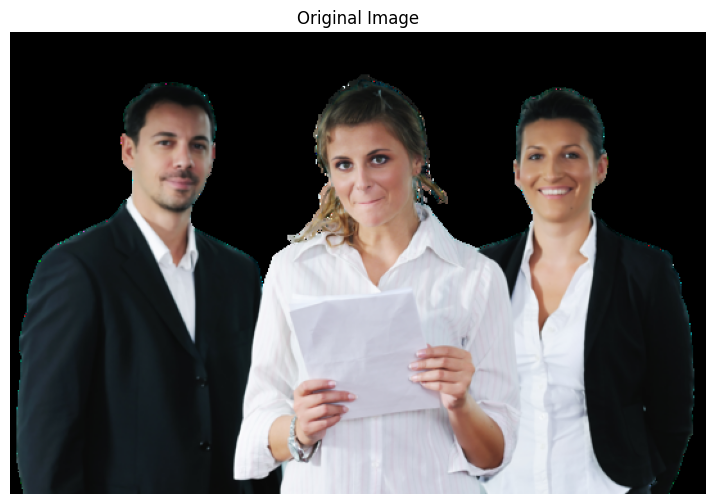

In [34]:

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale (required for Haar Cascade detection)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(f"Image shape: {image.shape}")
print(f"Grayscale shape: {gray.shape}")

# Display original image
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()


Number of faces detected: 3
Face at: x=96, y=58, width=74, height=74
Face at: x=388, y=70, width=70, height=70
Face at: x=236, y=72, width=75, height=75


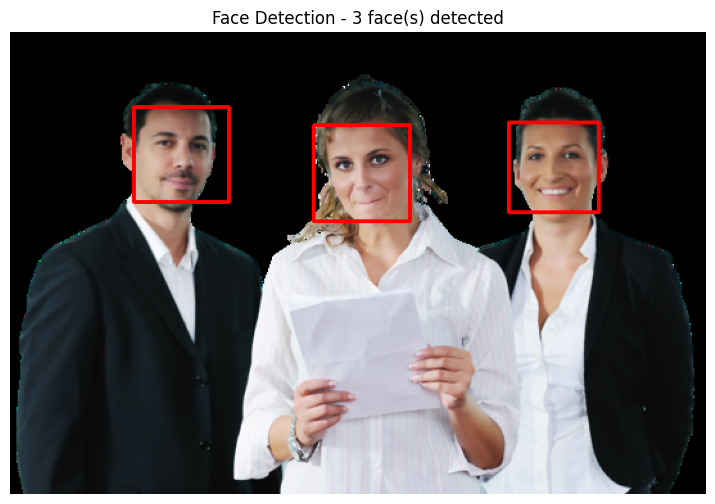

In [35]:
# detectMultiScale : It scans the image at multiple scales and returns bounding boxes for regions that look like faces.
# Parameters explained:
# - scaleFactor: how much image size is reduced at each scale (1.1 = 10% reduction). Lower Value : More faced deteced but slower.  Higher Value: Faster but might miss faces
# - minNeighbors: Minimum number of overlapping detections required to confirm a face.
# - minSize: minimum face size to detect

faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,      # Default: 1.1 (range: 1.01 to 1.3)
    minNeighbors=5,       # Default: 3-6 (higher = fewer false positives)
    minSize=(30, 30)      # Minimum face size in pixels
)

print(f"Number of faces detected: {len(faces)}")

# Draw rectangles around detected faces
image_with_faces = image_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x+w, y+h), (255, 0, 0), 2)
    print(f"Face at: x={x}, y={y}, width={w}, height={h}")

plt.figure(figsize=(10, 6))
plt.imshow(image_with_faces)
plt.title(f'Face Detection - {len(faces)} face(s) detected')
plt.axis('off')
plt.show()


Face at (96,58): 2 eyes detected
Face at (388,70): 2 eyes detected
Face at (236,72): 2 eyes detected


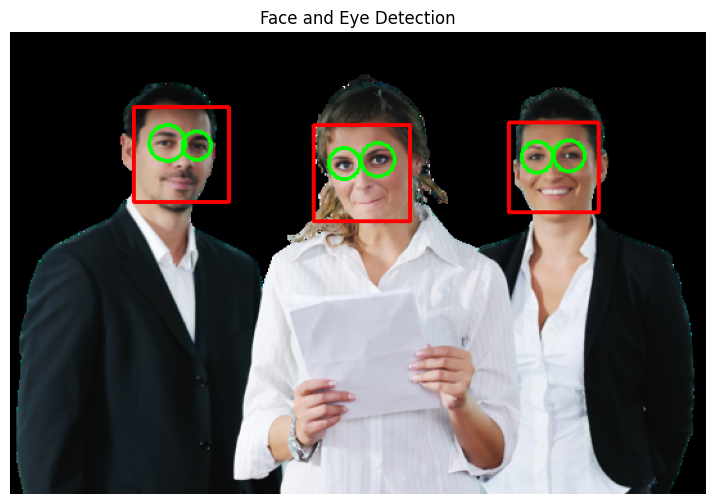

In [36]:
# Detect eyes only within detected face regions (ROI - Region of Interest)
image_with_eyes = image_rgb.copy()

# Each face detected by face_cascade.detectMultiScale() is represented as (x,y), w and h
for (x, y, w, h) in faces:
    # Draw face rectangle
    cv2.rectangle(image_with_eyes, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Extract ROI from grayscale image
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_with_eyes[y:y+h, x:x+w]

    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.1,
        minNeighbors=10,      # Higher value to reduce false positives
        minSize=(20, 20)
    )

    print(f"Face at ({x},{y}): {len(eyes)} eyes detected")

    # Draw circles around detected eyes
    for (ex, ey, ew, eh) in eyes:
        center = (x + ex + ew//2, y + ey + eh//2)
        radius = int((ew + eh) / 4)
        cv2.circle(image_with_eyes, center, radius, (0, 255, 0), 2)

plt.figure(figsize=(10, 6))
plt.imshow(image_with_eyes)
plt.title('Face and Eye Detection')
plt.axis('off')
plt.show()


Number of faces detected: 3
Face at: x=96, y=58, width=74, height=74
Face at: x=388, y=70, width=70, height=70
Face at: x=236, y=72, width=75, height=75


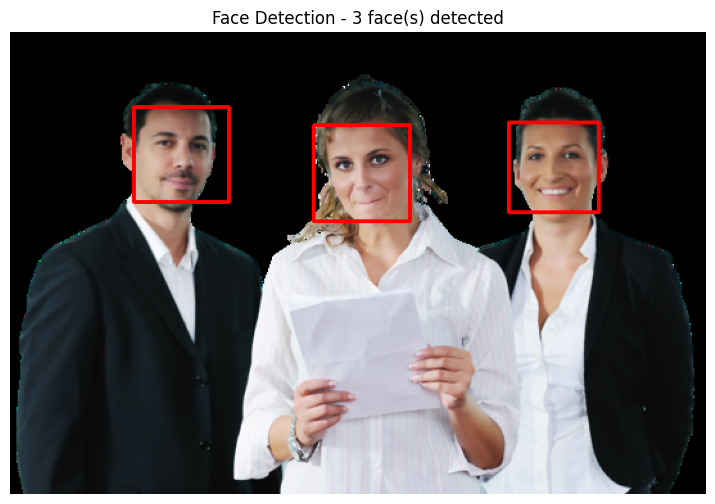

Face at (96,58): 2 eyes detected (regular: 2, glasses: 1)
Face at (388,70): 2 eyes detected (regular: 3, glasses: 2)
Face at (236,72): 1 eyes detected (regular: 2, glasses: 2)


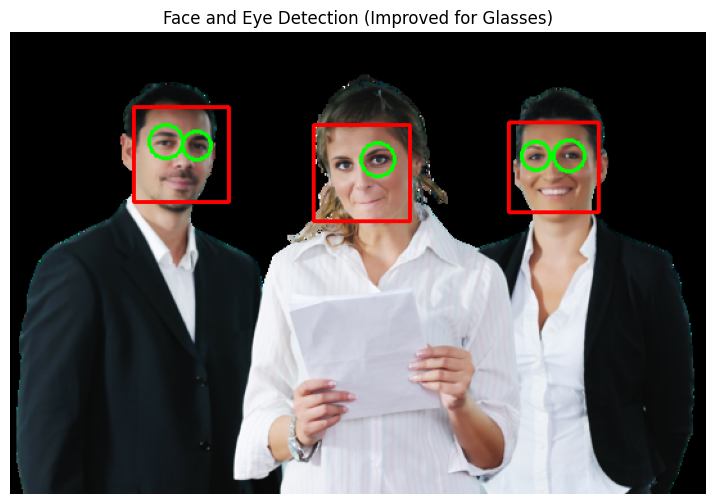

In [37]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,      # Default: 1.1 (range: 1.01 to 1.3)
    minNeighbors=5,       # Default: 3-6 (higher = fewer false positives)
    minSize=(30, 30)      # Minimum face size in pixels
)

print(f"Number of faces detected: {len(faces)}")

# Draw rectangles around detected faces
image_with_faces = image_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x+w, y+h), (255, 0, 0), 2)
    print(f"Face at: x={x}, y={y}, width={w}, height={h}")

plt.figure(figsize=(10, 6))
plt.imshow(image_with_faces)
plt.title(f'Face Detection - {len(faces)} face(s) detected')
plt.axis('off')
plt.show()

# Detect eyes only within detected face regions (ROI - Region of Interest)
# Using both regular eye cascade and eye glasses cascade
image_with_eyes = image_rgb.copy()

for (x, y, w, h) in faces:
    # Draw face rectangle
    cv2.rectangle(image_with_eyes, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Extract ROI from grayscale image
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_with_eyes[y:y+h, x:x+w]

    # Detect eyes using REGULAR eye cascade (relaxed parameters)
    eyes_regular = eye_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.05,     # More thorough search (was 1.1)
        minNeighbors=3,       # Lower to detect more eyes (was 10)
        minSize=(15, 15),     # Smaller minimum size (was 20, 20)
        maxSize=(80, 80)      # Add max size to avoid false positives
    )

    # Detect eyes using EYE GLASSES cascade. Normal eye cascade often failswith specs. Use below for better results
    eyes_glasses = eye_glasses_cascade.detectMultiScale(
        roi_gray,
        scaleFactor=1.05,
        minNeighbors=3,
        minSize=(20, 20)
    )

    # Combine both detections
    all_eyes = list(eyes_regular) + list(eyes_glasses)

    # Remove duplicate detections (eyes detected by both cascades)
    # Compare top-left (x, y) positions. If two detections are within 25 pixels, they are assumed to be the same eye
    unique_eyes = []
    for eye in all_eyes:
        is_duplicate = False
        for unique in unique_eyes:
            # Check if eyes overlap (within 25 pixels)
            if abs(eye[0] - unique[0]) < 25 and abs(eye[1] - unique[1]) < 25:
                is_duplicate = True
                break
        if not is_duplicate:
            unique_eyes.append(eye)

    print(f"Face at ({x},{y}): {len(unique_eyes)} eyes detected (regular: {len(eyes_regular)}, glasses: {len(eyes_glasses)})")

    # Draw circles around detected eyes
    for (ex, ey, ew, eh) in unique_eyes:
        center = (x + ex + ew//2, y + ey + eh//2)
        radius = int((ew + eh) / 4)
        cv2.circle(image_with_eyes, center, radius, (0, 255, 0), 2)

plt.figure(figsize=(10, 6))
plt.imshow(image_with_eyes)
plt.title('Face and Eye Detection (Improved for Glasses)')
plt.axis('off')
plt.show()


EXPERIMENT 1: Testing scaleFactor
scaleFactor=1.05: 3 faces detected
scaleFactor=1.1: 3 faces detected
scaleFactor=1.2: 3 faces detected
scaleFactor=1.3: 3 faces detected


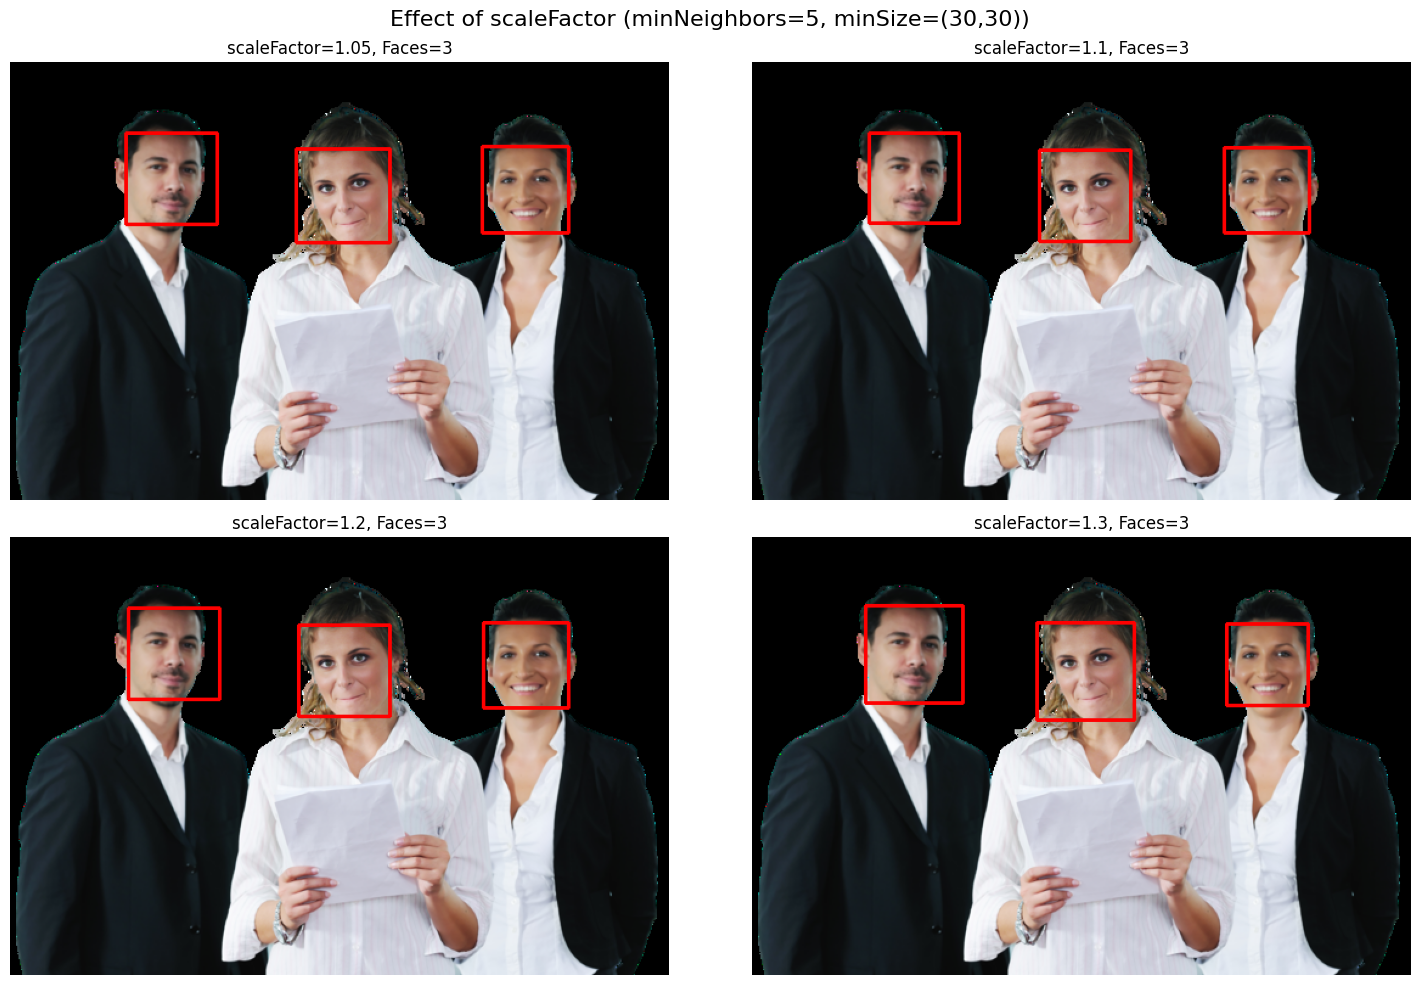

In [38]:
# Experiment with different scaleFactor values
def detect_with_params(image, gray, scale_factor, min_neighbors, min_size):
    """
    Test face detection with different parameters
    """
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=scale_factor,
        minNeighbors=min_neighbors,
        minSize=min_size
    )

    result = image.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(result, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return result, len(faces)

# Test different scaleFactor values
print("="*60)
print("EXPERIMENT 1: Testing scaleFactor")
print("="*60)

scale_factors = [1.05, 1.1, 1.2, 1.3]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Effect of scaleFactor (minNeighbors=5, minSize=(30,30))', fontsize=16)

for idx, sf in enumerate(scale_factors):
    result, count = detect_with_params(image_rgb, gray, sf, 5, (30, 30))
    axes[idx//2, idx%2].imshow(result)
    axes[idx//2, idx%2].set_title(f'scaleFactor={sf}, Faces={count}')
    axes[idx//2, idx%2].axis('off')
    print(f"scaleFactor={sf}: {count} faces detected")

plt.tight_layout()
plt.show()



EXPERIMENT 2: Testing minNeighbors
minNeighbors=1: 3 faces detected
minNeighbors=3: 3 faces detected
minNeighbors=5: 3 faces detected
minNeighbors=10: 3 faces detected


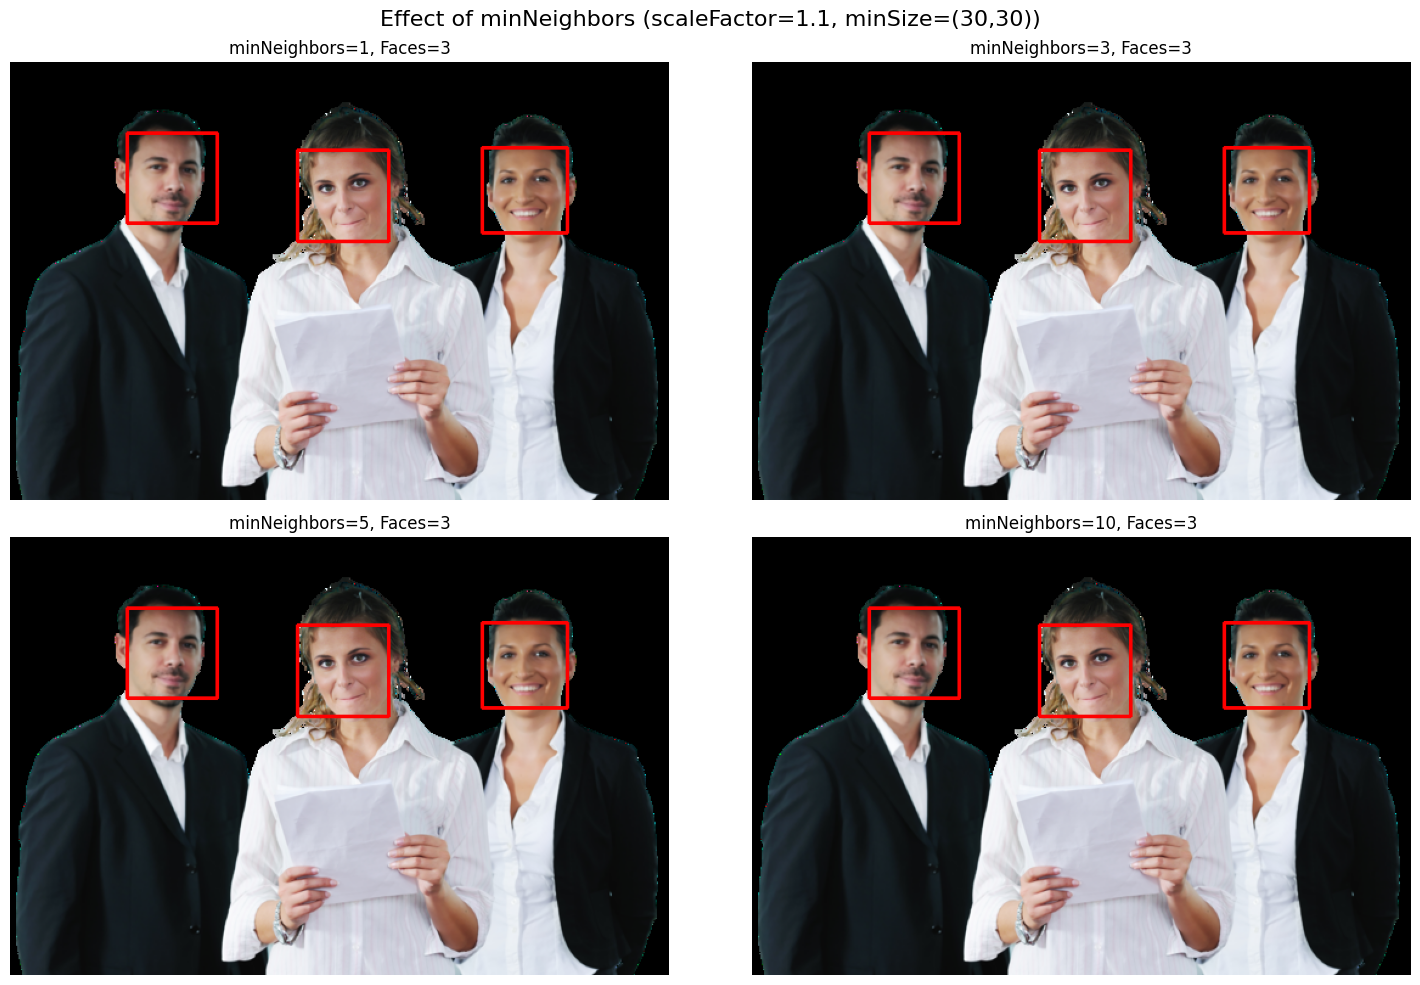


Observation:
- Lower minNeighbors (1-3): More detections but more FALSE POSITIVES
- Higher minNeighbors (8-10): Fewer false positives but may MISS some faces


In [39]:
# Test different minNeighbors values
print("\n" + "="*60)
print("EXPERIMENT 2: Testing minNeighbors")
print("="*60)

min_neighbors_list = [1, 3, 5, 10]
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Effect of minNeighbors (scaleFactor=1.1, minSize=(30,30))', fontsize=16)

for idx, mn in enumerate(min_neighbors_list):
    result, count = detect_with_params(image_rgb, gray, 1.1, mn, (30, 30))
    axes[idx//2, idx%2].imshow(result)
    axes[idx//2, idx%2].set_title(f'minNeighbors={mn}, Faces={count}')
    axes[idx//2, idx%2].axis('off')
    print(f"minNeighbors={mn}: {count} faces detected")

plt.tight_layout()
plt.show()

print("\nObservation:")
print("- Lower minNeighbors (1-3): More detections but more FALSE POSITIVES")
print("- Higher minNeighbors (8-10): Fewer false positives but may MISS some faces")


Extracting individual faces from group photo...


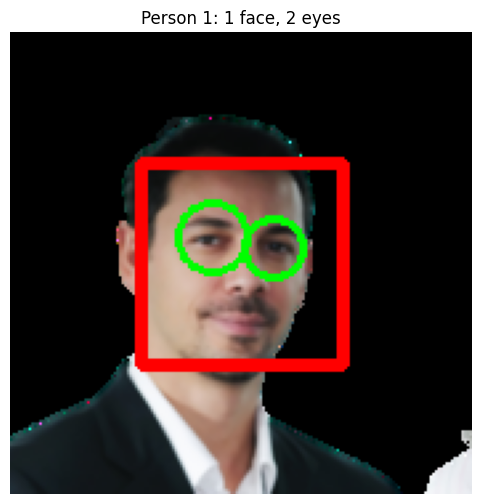

Person 1: 1 face(s), 2 eye(s) detected


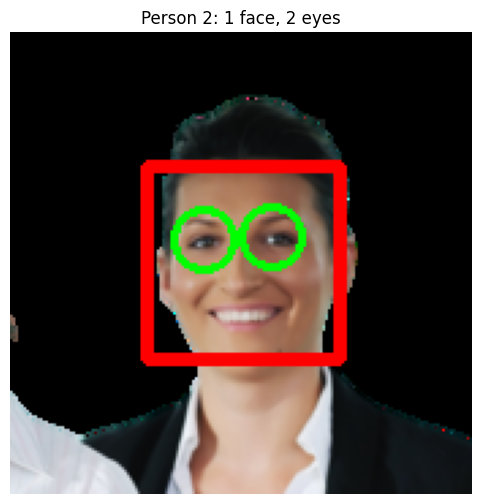

Person 2: 1 face(s), 2 eye(s) detected


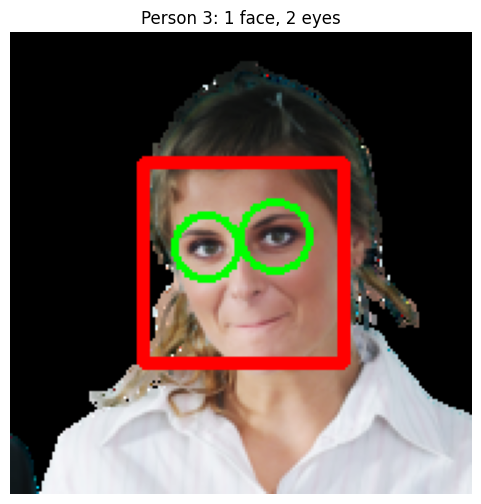

Person 3: 1 face(s), 2 eye(s) detected


In [40]:
# Automatically extract each detected face as separate images
print("Extracting individual faces from group photo...")

for idx, (x, y, w, h) in enumerate(faces):
    # Add padding around face
    padding = 50
    x_start = max(0, x - padding)
    y_start = max(0, y - padding)
    x_end = min(image_rgb.shape[1], x + w + padding)
    y_end = min(image_rgb.shape[0], y + h + padding)

    # Crop single person
    single_person = image_rgb[y_start:y_end, x_start:x_end]
    single_gray = cv2.cvtColor(single_person, cv2.COLOR_RGB2GRAY)

    # Detect on cropped image
    faces_single = face_cascade.detectMultiScale(single_gray, 1.1, 5, minSize=(30, 30))
    result_single = single_person.copy()

    for (fx, fy, fw, fh) in faces_single:
        cv2.rectangle(result_single, (fx, fy), (fx+fw, fy+fh), (255, 0, 0), 3)

        roi_gray = single_gray[fy:fy+fh, fx:fx+fw]
        eyes_regular = eye_cascade.detectMultiScale(roi_gray, 1.05, 3, minSize=(15, 15), maxSize=(80, 80))
        eyes_glasses = eye_glasses_cascade.detectMultiScale(roi_gray, 1.05, 3, minSize=(20, 20))

        all_eyes = list(eyes_regular) + list(eyes_glasses)
        unique_eyes = []
        for eye in all_eyes:
            is_duplicate = False
            for unique in unique_eyes:
                if abs(eye[0] - unique[0]) < 25 and abs(eye[1] - unique[1]) < 25:
                    is_duplicate = True
                    break
            if not is_duplicate:
                unique_eyes.append(eye)

        for (ex, ey, ew, eh) in unique_eyes:
            center = (fx + ex + ew//2, fy + ey + eh//2)
            radius = int((ew + eh) / 4)
            cv2.circle(result_single, center, radius, (0, 255, 0), 2)

    # Display each person
    plt.figure(figsize=(6, 6))
    plt.imshow(result_single)
    plt.title(f'Person {idx+1}: {len(faces_single)} face, {len(unique_eyes)} eyes')
    plt.axis('off')
    plt.show()

    print(f"Person {idx+1}: {len(faces_single)} face(s), {len(unique_eyes)} eye(s) detected")



TEST 1: Single Person Photos (Auto-extracted)

--- Testing Person 1 ---
Cropped image size: (174, 174, 3)
Face detected: Position (49,49), Size 76x76
Eyes detected: 2 (regular: 2, glasses: 1)

--- Testing Person 2 ---
Cropped image size: (170, 170, 3)
Face detected: Position (50,49), Size 71x71
Eyes detected: 2 (regular: 3, glasses: 1)

--- Testing Person 3 ---
Cropped image size: (175, 175, 3)
Face detected: Position (50,49), Size 76x76
Eyes detected: 2 (regular: 2, glasses: 2)


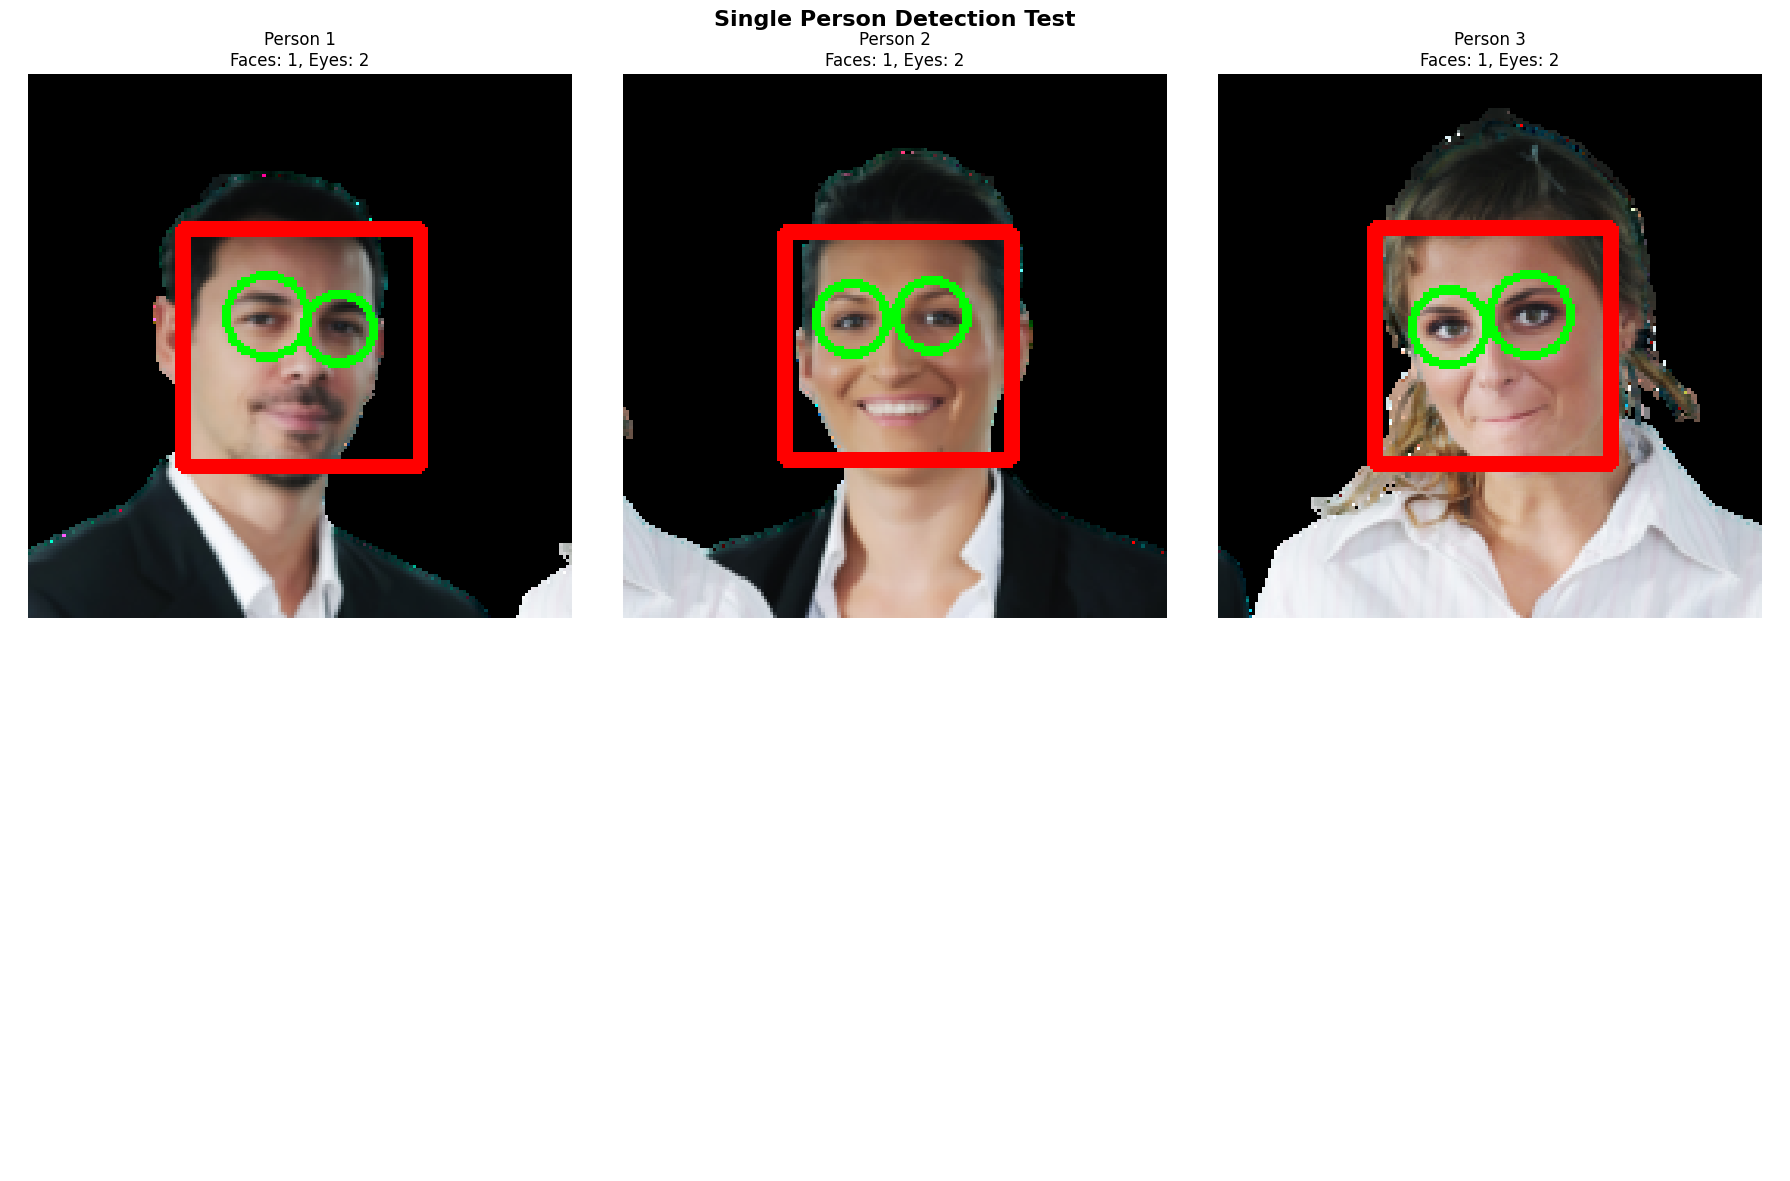


SINGLE PERSON DETECTION SUMMARY
Person    Faces          Eyes           Status
------------------------------------------------------------
1         1              2              ✓ Perfect
2         1              2              ✓ Perfect
3         1              2              ✓ Perfect

OBSERVATIONS:
✓ Single person detection is more reliable than group
✓ Less background noise and distractions
✓ Better eye detection with focused ROI
⚠️ People with glasses may still need parameter tuning


In [41]:
# Step 10: Test on Single Person Photos
print("\n" + "="*60)
print("TEST 1: Single Person Photos (Auto-extracted)")
print("="*60)

# Automatically extract and test each detected face as separate images
single_person_results = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Single Person Detection Test', fontsize=16, fontweight='bold')

for idx, (x, y, w, h) in enumerate(faces):
    if idx >= 6:  # Limit to 6 persons for display
        break

    print(f"\n--- Testing Person {idx+1} ---")

    # Add padding around face for better context
    padding = 50
    x_start = max(0, x - padding)
    y_start = max(0, y - padding)
    x_end = min(image_rgb.shape[1], x + w + padding)
    y_end = min(image_rgb.shape[0], y + h + padding)

    # Crop single person
    single_person = image_rgb[y_start:y_end, x_start:x_end]
    single_gray = cv2.cvtColor(single_person, cv2.COLOR_RGB2GRAY)

    print(f"Cropped image size: {single_person.shape}")

    # Detect faces on cropped image
    faces_single = face_cascade.detectMultiScale(
        single_gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    result_single = single_person.copy()
    total_eyes = 0

    # Process each detected face in the cropped image
    for (fx, fy, fw, fh) in faces_single:
        # Draw face rectangle
        cv2.rectangle(result_single, (fx, fy), (fx+fw, fy+fh), (255, 0, 0), 3)

        # Extract face ROI
        roi_gray = single_gray[fy:fy+fh, fx:fx+fw]

        # Detect eyes using both cascades
        eyes_regular = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.05,
            minNeighbors=3,
            minSize=(15, 15),
            maxSize=(80, 80)
        )

        eyes_glasses = eye_glasses_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.05,
            minNeighbors=3,
            minSize=(20, 20)
        )

        # Combine and remove duplicates
        all_eyes = list(eyes_regular) + list(eyes_glasses)
        unique_eyes = []

        for eye in all_eyes:
            is_duplicate = False
            for unique in unique_eyes:
                if abs(eye[0] - unique[0]) < 25 and abs(eye[1] - unique[1]) < 25:
                    is_duplicate = True
                    break
            if not is_duplicate:
                unique_eyes.append(eye)

        total_eyes = len(unique_eyes)

        # Draw eye circles
        for (ex, ey, ew, eh) in unique_eyes:
            center = (fx + ex + ew//2, fy + ey + eh//2)
            radius = int((ew + eh) / 4)
            cv2.circle(result_single, center, radius, (0, 255, 0), 2)

        print(f"Face detected: Position ({fx},{fy}), Size {fw}x{fh}")
        print(f"Eyes detected: {total_eyes} (regular: {len(eyes_regular)}, glasses: {len(eyes_glasses)})")

    # Store results
    single_person_results.append({
        'person_id': idx + 1,
        'faces_detected': len(faces_single),
        'eyes_detected': total_eyes,
        'image_size': single_person.shape
    })

    # Display in subplot
    ax = axes[idx // 3, idx % 3]
    ax.imshow(result_single)
    ax.set_title(f'Person {idx+1}\nFaces: {len(faces_single)}, Eyes: {total_eyes}')
    ax.axis('off')

# Hide empty subplots if less than 6 people
for idx in range(len(faces), 6):
    axes[idx // 3, idx % 3].axis('off')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SINGLE PERSON DETECTION SUMMARY")
print("="*60)
print(f"{'Person':<10}{'Faces':<15}{'Eyes':<15}{'Status'}")
print("-"*60)

for result in single_person_results:
    if result['faces_detected'] == 1 and result['eyes_detected'] >= 2:
        status = "✓ Perfect"
    elif result['faces_detected'] == 1:
        status = "⚠️ Face OK, Eyes missed"
    elif result['faces_detected'] == 0:
        status = "❌ Face missed"
    else:
        status = "⚠️ Multiple faces"

    print(f"{result['person_id']:<10}{result['faces_detected']:<15}{result['eyes_detected']:<15}{status}")

print("\n" + "="*60)
print("OBSERVATIONS:")
print("="*60)
print("✓ Single person detection is more reliable than group")
print("✓ Less background noise and distractions")
print("✓ Better eye detection with focused ROI")
print("⚠️ People with glasses may still need parameter tuning")



TEST 2: Rotated Photos (Testing Haar Cascade Limitations)

Angle          Faces Detected      Status
--------------------------------------------------
0°            3                   ✓ Baseline
15°            2                   ⚠️ Partial detection
30°            1                   ⚠️ Partial detection
45°            0                   ❌ Failed
90°            0                   ❌ Failed
180°            1                   ⚠️ Partial detection


/tmp/ipython-input-338178129.py:85: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


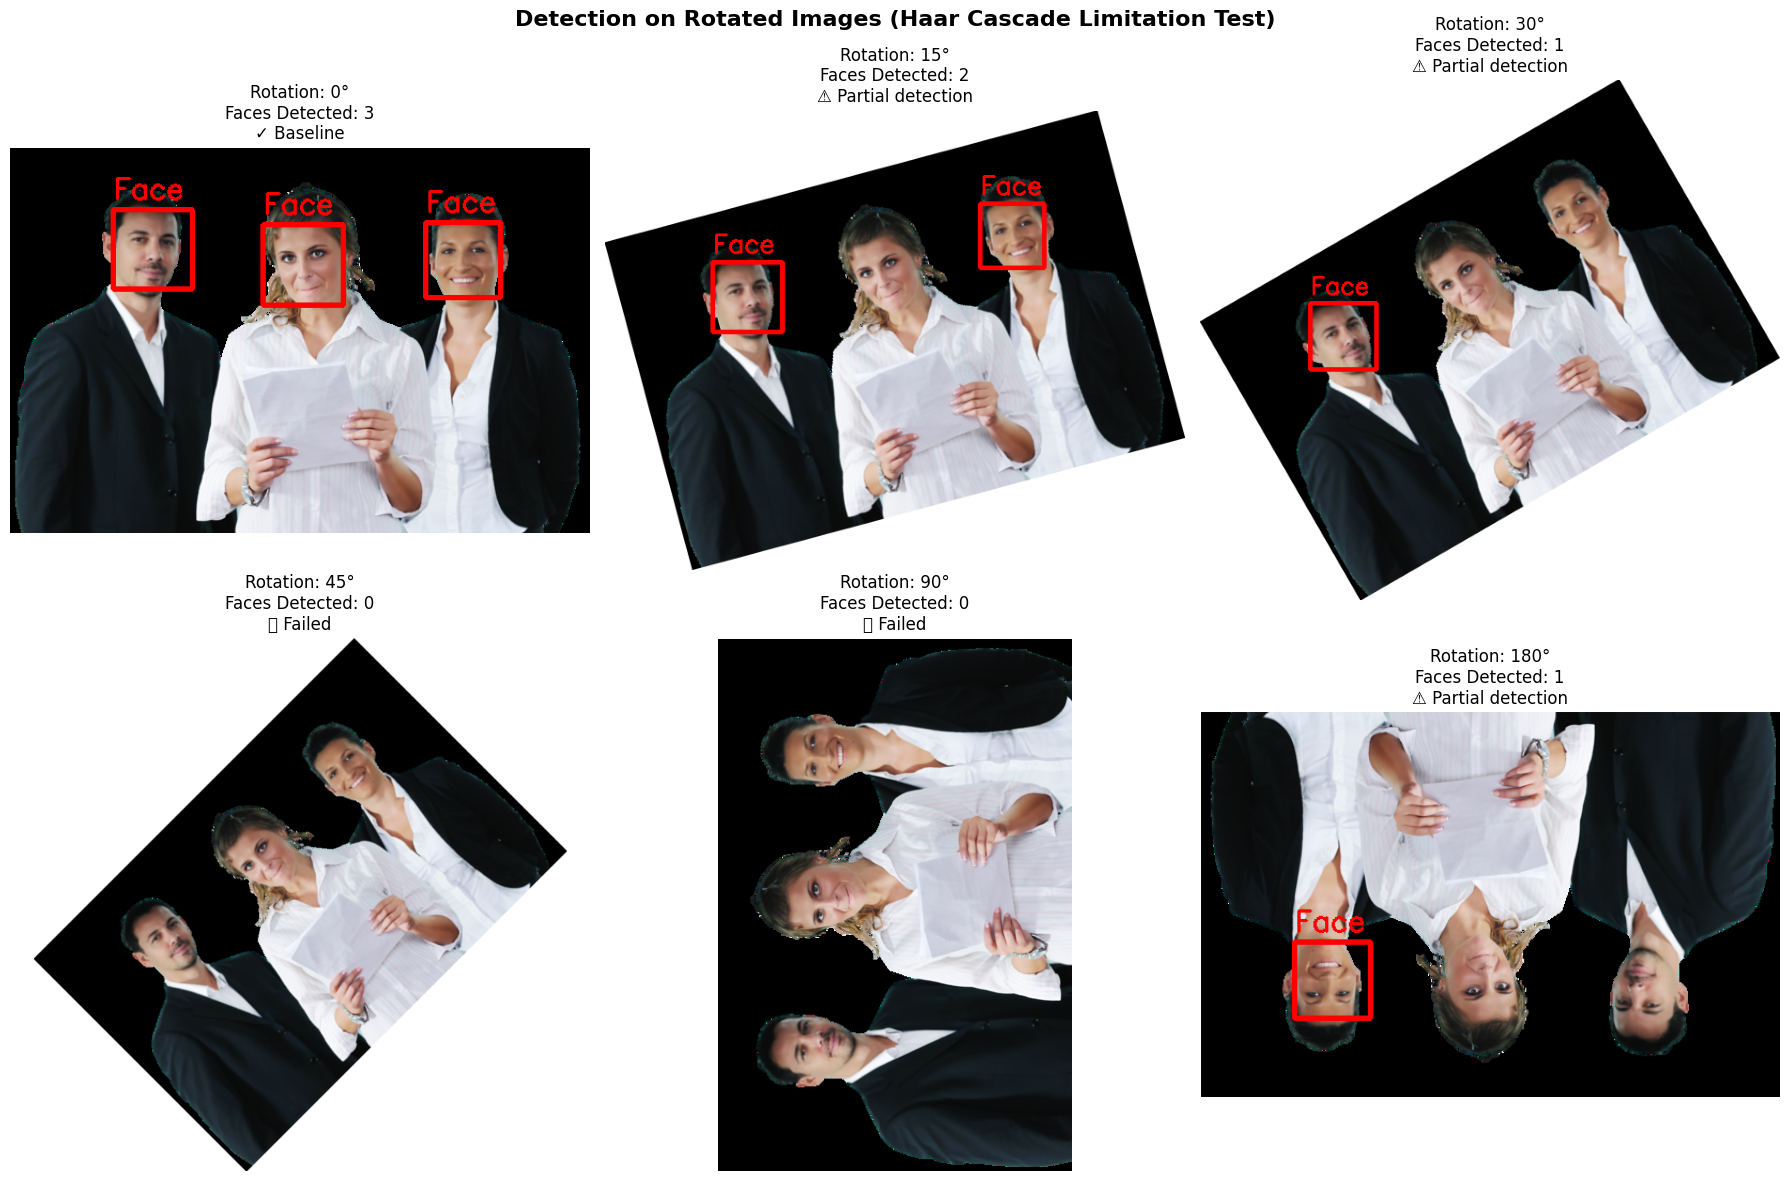


ROTATION TEST OBSERVATIONS:
✓ 0° (upright): Full detection works perfectly
⚠️ 15-30°: Slight degradation, most faces still detected
❌ 45°+: Significant failure, most faces missed
❌ 90° (sideways): Complete failure, no faces detected
❌ 180° (upside down): Complete failure

🔴 LIMITATION: Haar Cascade only works on FRONTAL, UPRIGHT faces!


In [42]:
# Test rotation sensitivity - Major limitation of Haar Cascade
print("\n" + "="*60)
print("TEST 2: Rotated Photos (Testing Haar Cascade Limitations)")
print("="*60)

def rotate_and_detect(image, gray, angle):
    """
    Rotate image and attempt face detection
    """
    h, w = image.shape[:2]
    center = (w // 2, h // 2)

    # Create rotation matrix
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Calculate new image dimensions to avoid cropping
    cos = np.abs(matrix[0, 0])
    sin = np.abs(matrix[0, 1])
    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    # Adjust rotation matrix for new dimensions
    matrix[0, 2] += (new_w / 2) - center[0]
    matrix[1, 2] += (new_h / 2) - center[1]

    # Perform rotation with white background
    rotated = cv2.warpAffine(image, matrix, (new_w, new_h), borderValue=(255, 255, 255))
    rotated_gray = cv2.cvtColor(rotated, cv2.COLOR_RGB2GRAY)

    # Detect faces on rotated image
    faces = face_cascade.detectMultiScale(
        rotated_gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30)
    )

    # Draw rectangles around detected faces
    result = rotated.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(result, (x, y), (x+w, y+h), (255, 0, 0), 3)
        cv2.putText(result, 'Face', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.9, (255, 0, 0), 2)

    return result, len(faces)

# Test different rotation angles
angles = [0, 15, 30, 45, 90, 180]
rotation_results = []

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Detection on Rotated Images (Haar Cascade Limitation Test)', fontsize=16, fontweight='bold')

print(f"\n{'Angle':<15}{'Faces Detected':<20}{'Status'}")
print("-"*50)

for idx, angle in enumerate(angles):
    result, count = rotate_and_detect(image_rgb, gray, angle)

    # Determine status
    original_faces = len(faces)
    if angle == 0:
        status = "✓ Baseline"
    elif count >= original_faces * 0.8:
        status = "✓ Good"
    elif count >= original_faces * 0.3:
        status = "⚠️ Partial detection"
    else:
        status = "❌ Failed"

    print(f"{angle}°{'':<12}{count:<20}{status}")

    rotation_results.append({
        'angle': angle,
        'faces_detected': count,
        'status': status
    })

    # Display in subplot
    ax = axes[idx // 3, idx % 3]
    ax.imshow(result)
    ax.set_title(f'Rotation: {angle}°\nFaces Detected: {count}\n{status}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("ROTATION TEST OBSERVATIONS:")
print("="*60)
print("✓ 0° (upright): Full detection works perfectly")
print("⚠️ 15-30°: Slight degradation, most faces still detected")
print("❌ 45°+: Significant failure, most faces missed")
print("❌ 90° (sideways): Complete failure, no faces detected")
print("❌ 180° (upside down): Complete failure")
print("\n🔴 LIMITATION: Haar Cascade only works on FRONTAL, UPRIGHT faces!")



ANALYSIS: False Positives vs Misses (Parameter Tuning)
Expected faces in image: 3

ScaleFactor    MinNeighbors   Detected    Expected    Result
----------------------------------------------------------------------
1.05           1              5           3           ⚠️ FALSE POSITIVES (2)
1.05           3              3           3           ✓ Perfect (0)
1.05           5              3           3           ✓ Perfect (0)
1.05           8              3           3           ✓ Perfect (0)
1.05           10             3           3           ✓ Perfect (0)
1.1            1              3           3           ✓ Perfect (0)
1.1            3              3           3           ✓ Perfect (0)
1.1            5              3           3           ✓ Perfect (0)
1.1            8              3           3           ✓ Perfect (0)
1.1            10             3           3           ✓ Perfect (0)
1.2            1              5           3           ⚠️ FALSE POSITIVES (2)
1.2            3  

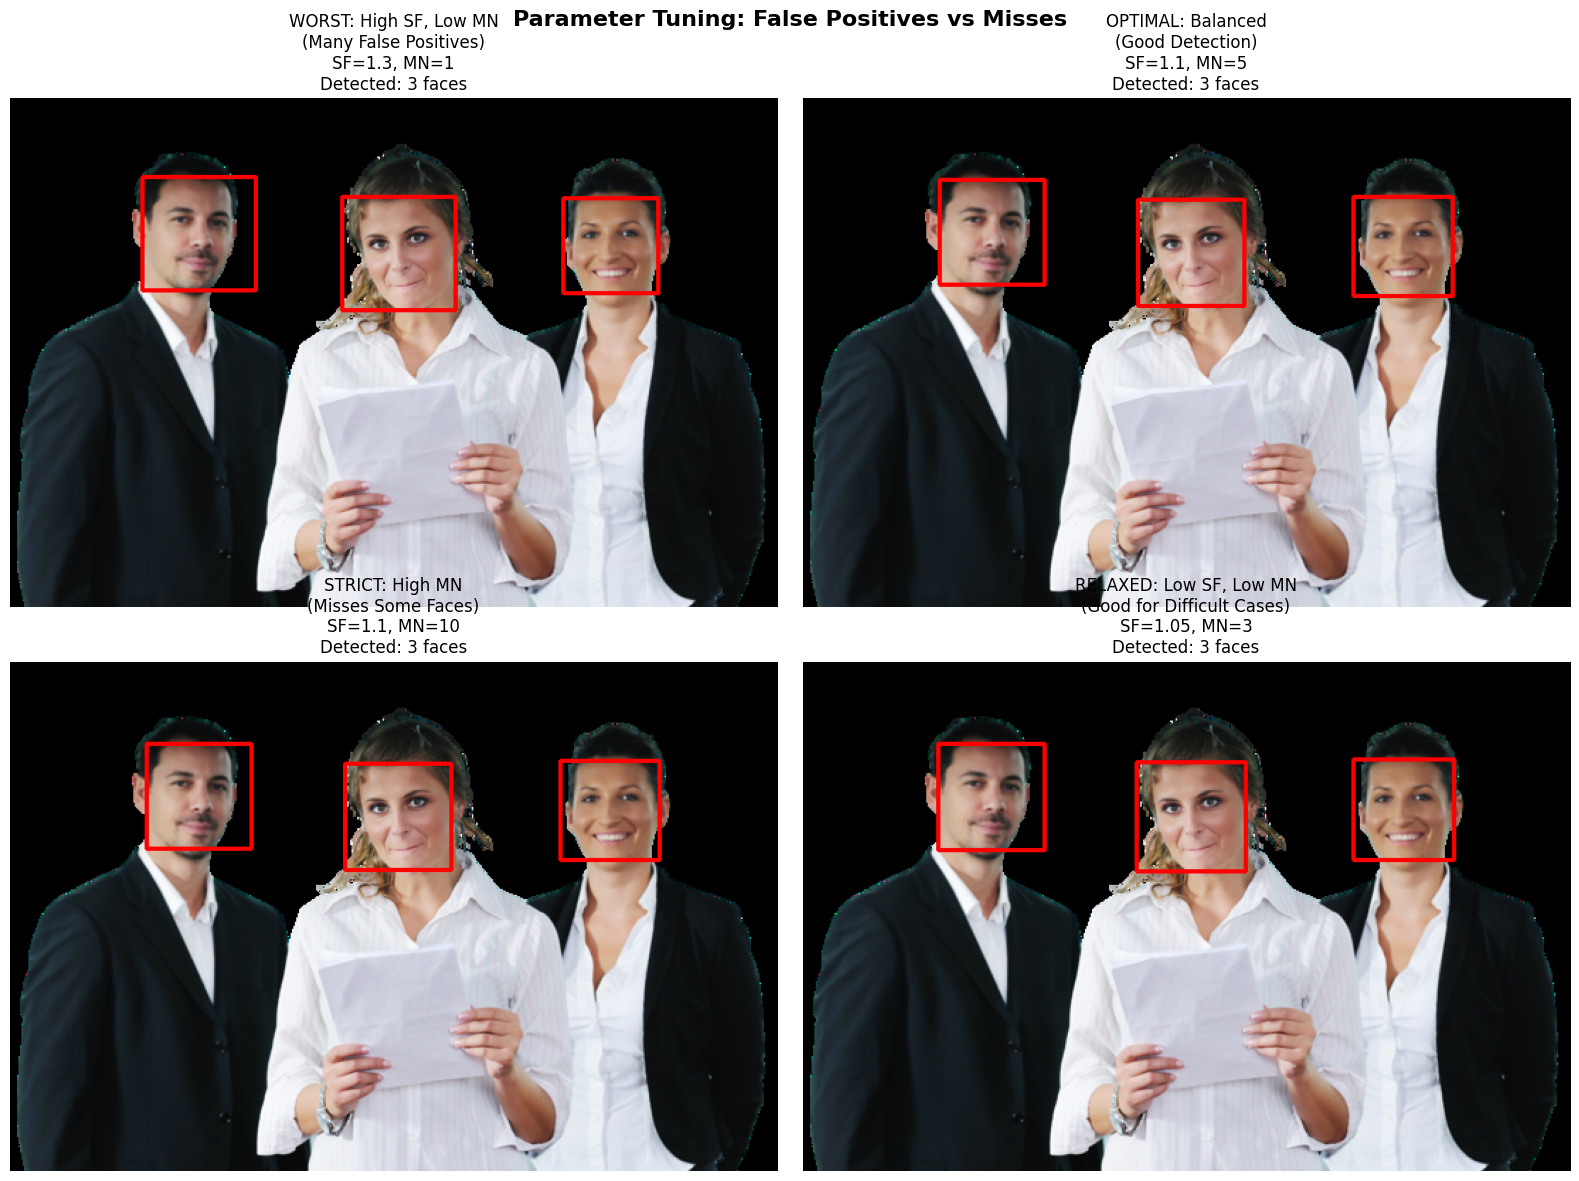

In [43]:
# Comprehensive parameter grid search
print("\n" + "="*60)
print("ANALYSIS: False Positives vs Misses (Parameter Tuning)")
print("="*60)

def parameter_grid_search(image, gray, true_face_count):
    """
    Systematic analysis of parameter combinations
    Find false positives and misses
    """
    results = []

    scale_factors = [1.05, 1.1, 1.2, 1.3]
    min_neighbors_list = [1, 3, 5, 8, 10]

    print(f"\n{'ScaleFactor':<15}{'MinNeighbors':<15}{'Detected':<12}{'Expected':<12}{'Result'}")
    print("-"*70)

    for sf in scale_factors:
        for mn in min_neighbors_list:
            faces_detected = face_cascade.detectMultiScale(
                gray,
                scaleFactor=sf,
                minNeighbors=mn,
                minSize=(30, 30)
            )

            detected_count = len(faces_detected)

            # Classify result
            if detected_count < true_face_count:
                result_type = "❌ MISSES"
                difference = true_face_count - detected_count
            elif detected_count > true_face_count:
                result_type = "⚠️ FALSE POSITIVES"
                difference = detected_count - true_face_count
            else:
                result_type = "✓ Perfect"
                difference = 0

            print(f"{sf:<15}{mn:<15}{detected_count:<12}{true_face_count:<12}{result_type} ({difference})")

            results.append({
                'scaleFactor': sf,
                'minNeighbors': mn,
                'faces_detected': detected_count,
                'difference': difference,
                'result': result_type
            })

    return results

# Run grid search (assuming you know true face count from visual inspection)
true_face_count = len(faces)  # Use initial detection as baseline
print(f"Expected faces in image: {true_face_count}")

grid_results = parameter_grid_search(image_rgb, gray, true_face_count)

# Visualize best and worst cases
print("\n" + "="*60)
print("VISUAL COMPARISON: Best vs Worst Parameters")
print("="*60)

test_configs = [
    {'sf': 1.3, 'mn': 1, 'title': 'WORST: High SF, Low MN\n(Many False Positives)'},
    {'sf': 1.1, 'mn': 5, 'title': 'OPTIMAL: Balanced\n(Good Detection)'},
    {'sf': 1.1, 'mn': 10, 'title': 'STRICT: High MN\n(Misses Some Faces)'},
    {'sf': 1.05, 'mn': 3, 'title': 'RELAXED: Low SF, Low MN\n(Good for Difficult Cases)'}
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Parameter Tuning: False Positives vs Misses', fontsize=16, fontweight='bold')

for idx, config in enumerate(test_configs):
    result_img = image_rgb.copy()

    faces_test = face_cascade.detectMultiScale(
        gray,
        scaleFactor=config['sf'],
        minNeighbors=config['mn'],
        minSize=(30, 30)
    )

    for (x, y, w, h) in faces_test:
        cv2.rectangle(result_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    ax = axes[idx // 2, idx % 2]
    ax.imshow(result_img)
    ax.set_title(f"{config['title']}\nSF={config['sf']}, MN={config['mn']}\nDetected: {len(faces_test)} faces")
    ax.axis('off')

plt.tight_layout()
plt.show()
